# 실습1. 금융 시계열 및 파이썬을 활용한 전통 퀀트 방법 구현

In [2]:
import FinanceDataReader as fdr

## 1. 거래소별 전체 종목 코드 수집

In [2]:
# 한국거래소 상장 종목 가져오기
df_krx = fdr.StockListing('KRX')
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,54800,1,200,0.37,54700,55000,54400,7814322,427710077350,324396158125600,5919637922,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,190100,2,-200,-0.11,192000,192800,186800,2539822,480995533500,138393249586500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,318000,2,-9500,-2.90,327500,327500,317500,252119,80427910000,74412000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,1040000,1,4000,0.39,1042000,1043000,1032000,37554,38995592000,74020960000000,71174000,STK
4,012450,KR7012450003,한화에어로스페이스,KOSPI,,878000,2,-5000,-0.57,888000,898000,873000,368386,324800403932,40020259358000,45581161,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1200,2,-63,-4.99,1400,1400,1074,45,50700,1895952000,1579960,KNX
2876,288490,KR7288490006,나라소프트,KONEX,일반기업부,105,0,0,0.00,0,0,0,0,0,1834515585,17471577,KNX
2877,236030,KR7236030003,씨알푸드,KONEX,일반기업부,799,2,-31,-3.73,706,799,706,201,141999,1624632268,2033332,KNX
2878,308700,KR7308700004,테크엔,KONEX,일반기업부,199,0,0,0.00,0,0,0,0,0,1472600000,7400000,KNX


In [3]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2880 non-null   object 
 1   ISU_CD       2880 non-null   object 
 2   Name         2880 non-null   object 
 3   Market       2880 non-null   object 
 4   Dept         2880 non-null   object 
 5   Close        2880 non-null   object 
 6   ChangeCode   2880 non-null   object 
 7   Changes      2880 non-null   int64  
 8   ChagesRatio  2880 non-null   float64
 9   Open         2880 non-null   int64  
 10  High         2880 non-null   int64  
 11  Low          2880 non-null   int64  
 12  Volume       2880 non-null   int64  
 13  Amount       2880 non-null   int64  
 14  Marcap       2880 non-null   int64  
 15  Stocks       2880 non-null   int64  
 16  MarketId     2880 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 382.6+ KB


In [4]:
df_krx.columns

Index(['Code', 'ISU_CD', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode',
       'Changes', 'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount',
       'Marcap', 'Stocks', 'MarketId'],
      dtype='object')

In [7]:
df_spx = fdr.StockListing('S&P500')
print(len(df_spx))
df_spx

503


,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment


## 2. 가격 데이터 수집

            Open  High   Low  Close  Volume    Change
Date                                                 
2018-01-02  2795  2860  2795   2850  118224  0.019678
2018-01-03  2850  2860  2820   2845  152892 -0.001754
2018-01-04  2845  2860  2815   2820  195786 -0.008787
2018-01-05  2820  2920  2820   2900  283369  0.028369
2018-01-08  2900  2940  2870   2900  179173  0.000000
2018-01-09  2920  2945  2860   2875  209231 -0.008621
2018-01-10  2850  2970  2850   2955  440681  0.027826
2018-01-11  2975  2975  2930   2940  200819 -0.005076
2018-01-12  2930  2955  2890   2910  156725 -0.010204
2018-01-15  2910  2915  2870   2895  245777 -0.005155


<Axes: xlabel='Date'>

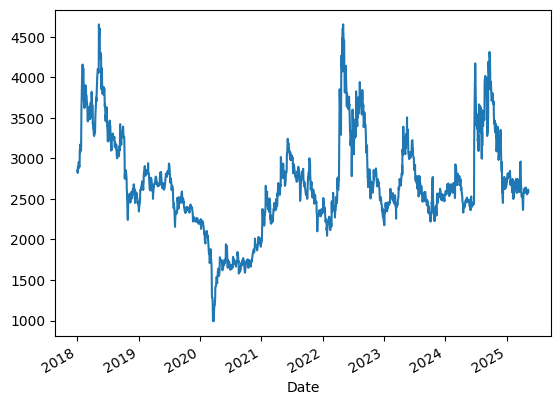

In [3]:
# GS 글로벌(001250), 2018년부터 현재까지
df = fdr.DataReader('001250','2018')
print(df.head(10))
df['Close'].plot()

<Axes: >

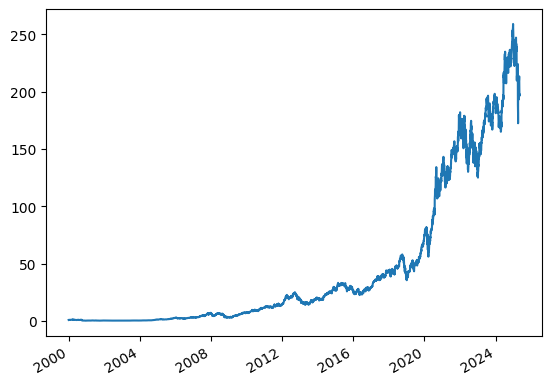

In [4]:
aapl_df = fdr.DataReader('AAPL','2000')
aapl_df['Close'].plot()

# PANDAS
### 1. shift() : 데이터 프레임이나 시리즈의 데이터를 위 아래로 이동

In [5]:
aapl_df['Close_lag1'] = aapl_df['Close'].shift()
aapl_df.head()

,Open,High,Low,Close,Volume,Adj Close,Close_lag1
1999-12-31,0.901228,0.918527,0.888393,0.917969,163811200,0.773500,NaN
2000-01-03,0.936384,1.004464,0.907924,0.999442,535796800,0.842151,0.917969
2000-01-04,0.966518,0.987723,0.903460,0.915179,512377600,0.771149,0.999442
2000-01-05,0.926339,0.987165,0.919643,0.928571,778321600,0.782433,0.915179
2000-01-06,0.947545,0.955357,0.848214,0.848214,767972800,0.714722,0.928571


### 2. pct_change() : 시리즈 또는 데이터프레임의 요소 간의 백분율 변화를 계산

In [6]:
aapl_df['pct_change'] = aapl_df['Close'].pct_change()
aapl_df.head(20)

,Open,High,Low,Close,Volume,Adj Close,Close_lag1,pct_change
1999-12-31,0.901228,0.918527,0.888393,0.917969,163811200,0.773500,NaN,NaN
2000-01-03,0.936384,1.004464,0.907924,0.999442,535796800,0.842151,0.917969,0.088754
2000-01-04,0.966518,0.987723,0.903460,0.915179,512377600,0.771149,0.999442,-0.084310
2000-01-05,0.926339,0.987165,0.919643,0.928571,778321600,0.782433,0.915179,0.014633
2000-01-06,0.947545,0.955357,0.848214,0.848214,767972800,0.714722,0.928571,-0.086538
2000-01-07,0.861607,0.901786,0.852679,0.888393,460734400,0.748578,0.848214,0.047369
2000-01-10,0.910714,0.912946,0.845982,0.872768,505064000,0.735413,0.888393,-0.017588
2000-01-11,0.856585,0.887277,0.808036,0.828125,441548800,0.697795,0.872768,-0.051151
2000-01-12,0.848214,0.852679,0.772321,0.778460,976068800,0.655946,0.828125,-0.059973
2000-01-13,0.843610,0.881696,0.825893,0.863839,1032684800,0.727889,0.778460,0.109677


### 3. rolling() : 이동평균이나 이동 표준편차 같은 이동 통계를 계산하는데 사용
* 괄호 안에 7을 넣으면 7일 이동평균 구할 수 있음

In [9]:
aapl_df['rolling7'] = aapl_df['Close'].rolling(window='7')
aapl_df.head(20)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "offsets.pyx", line 4855, in pandas._libs.tslibs.offsets.to_offset
ValueError: last element must be blank

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\이정호\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\window\rolling.py", line 1881, in _validate
    freq = to_offset(self.window)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "offsets.pyx", line 4791, in pandas._libs.tslibs.offsets.to_offset
  File "offsets.pyx", line 4954, in pandas._libs.tslibs.offsets.to_offset
ValueError: Invalid frequency: 7, failed to parse with error message: ValueError('last element must be blank')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\이정호\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, se